In [547]:
import pandas as pd
import numpy as np

import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [548]:
weather = pd.read_csv("weather_v2.csv")
weather.head()

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS


In [549]:
weather.drop(['temp_QCFlag', 'prec_QCFlag',
              'ws_QCFlag', 'wd_QCFlag', 'humid_QCFlag', 
              'landP_QCFlag', 'seaP', 'seaP_QCFlag',
              'suntime_QCFlag', '3hr_snow', 'lowmiddleC',
              'typeC', 'ceiling', 'sfctype', 'weathernumber', 
              'sfctemp', 'sfctemp_QCFlag', 'landtemp_5cm', 
              'landtemp_10cm', 'landtemp_20cm', 'landtemp_30cm',
              'station', 'area'], axis=1, inplace=True)

In [550]:
weather.columns

Index(['datetime', 'temp', 'prec', 'ws', 'wd', 'humid', 'vaporP', 'dew',
       'landP', 'suntime', 'rad', 'snow', 'C', 'vis'],
      dtype='object')

In [551]:
weather.datetime = pd.to_datetime(weather['datetime'])
weather_mean = weather.groupby('datetime').mean().fillna(0)

In [552]:
weather_max = weather.resample('d', on='datetime').max().fillna(0)
weather_mean = weather.resample('d', on='datetime').mean().fillna(0)
weather_min = weather.resample('d', on='datetime').min().fillna(0)
weather_sum = weather.resample('d', on='datetime').sum().fillna(0)

In [553]:
weather_mean.head()

,temp,prec,ws,wd,humid,vaporP,dew,landP,suntime,rad,snow,C,vis
datetime,,,,,,,,,,,,,
2018-02-01,1.271798,0.003444,3.523141,175.879137,67.423452,4.989130,-2.901087,977.602813,0.554167,0.684583,0.000000,6.352941,1552.097826
2018-02-02,0.419820,0.000000,3.852709,216.583973,57.458586,4.433333,-4.551042,978.190686,0.385417,0.857500,0.000000,6.722222,1988.760417
2018-02-03,-1.787600,0.289295,5.602110,269.011723,76.501677,4.533333,-4.243750,977.089770,0.191667,0.292500,1.053846,8.909091,1427.197917
2018-02-04,-3.873874,0.270012,5.975114,273.509932,79.000126,4.076042,-5.517708,977.746569,0.254167,0.445417,1.656452,8.833333,1330.406250
2018-02-05,-2.729229,0.243742,5.134080,269.770637,77.278655,4.305208,-4.848958,976.482598,0.318750,0.453750,5.217460,8.708333,1355.822917


In [554]:
# price of LNG

import pandas_datareader as pdr
import datetime

fuel_price = pdr.get_data_yahoo(['LNG'],
                            start='2017-12-01',
                            end='2020-05-19',
                            )['Open']

fuel_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 620 entries, 2017-11-30 to 2020-05-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LNG     620 non-null    float64
dtypes: float64(1)
memory usage: 9.7 KB


In [555]:
fuel_price = fuel_price.reindex(pd.date_range('2017-12-01', '2020-05-19')).fillna(method='backfill')
fuel_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 2017-12-01 to 2020-05-19
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LNG     901 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


In [556]:
# make fuel-lag data
fuel_price['LNG_1w'] = fuel_price['LNG'].shift(7)
fuel_price['LNG_2w'] = fuel_price['LNG'].shift(14)
fuel_price['LNG_3w'] = fuel_price['LNG'].shift(21)
fuel_price['LNG_4w'] = fuel_price['LNG'].shift(28)

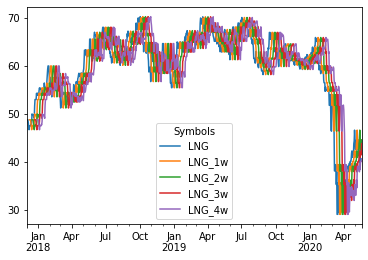

In [557]:
fuel_price.plot()

In [558]:
data_max = pd.concat([weather_max, fuel_price], axis=1, sort=False).dropna()
data_min = pd.concat([weather_min, fuel_price], axis=1, sort=False).dropna()
data_mean = pd.concat([weather_mean, fuel_price], axis=1, sort=False).dropna()

In [559]:
target = pd.read_csv("target_v2.csv")
target.head()

,date,smp_max,smp_min,smp_mean,supply
0,2018-02-01,150.65,116.84,132.71,87.47
1,2018-02-02,163.86,116.84,134.19,86.64
2,2018-02-03,164.07,116.85,131.39,88.28
3,2018-02-04,171.00,115.76,131.89,86.14
4,2018-02-05,170.34,123.89,137.96,90.63


In [560]:
target.index = pd.to_datetime(target.date)
target.drop('date', axis=1, inplace=True)

---------------------

In [590]:
data1= pd.concat([data_max, target.smp_max], axis=1, sort=False).dropna()
data2 = pd.concat([data_min, target.smp_min], axis=1, sort=False).dropna()
data3 = pd.concat([data_mean, target.smp_mean], axis=1, sort=False).dropna()

### XGboost

In [591]:
import xgboost as xgb

X1, y1 = data1.iloc[:,1:-1],data1.iloc[:,-1]
X2, y2 = data2.iloc[:,1:-1],data2.iloc[:,-1]
X3, y3 = data3.iloc[:,1:-1],data3.iloc[:,-1]

In [592]:
data_dmatrix1 = xgb.DMatrix(data=X1,label=y1)
data_dmatrix2 = xgb.DMatrix(data=X2,label=y2)
data_dmatrix3 = xgb.DMatrix(data=X3,label=y3)

In [595]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=False)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=False)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=False)

In [638]:
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.7,
                max_depth = 20, alpha = 15, n_estimators = 15)
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.3,
                max_depth = 8, alpha = 15, n_estimators = 14)
xg_reg3 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 7, alpha = 15, n_estimators = 15)

In [639]:
xg_reg1.fit(X1_train,y1_train)
preds1 = xg_reg1.predict(X1_test)

xg_reg2.fit(X2_train,y2_train)
preds2 = xg_reg2.predict(X2_test)

xg_reg3.fit(X3_train,y3_train)
preds3 = xg_reg3.predict(X3_test)

In [640]:
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(mean_squared_error(y1_test, preds1))
rmse2 = np.sqrt(mean_squared_error(y2_test, preds2))
rmse3 = np.sqrt(mean_squared_error(y3_test, preds3))

print("RMSE smp_max: %f" % (rmse1))
print("RMSE smp_min: %f" % (rmse2))
print("RMSE smp_mean: %f" % (rmse3))

RMSE smp_max: 16.471773
RMSE smp_min: 3.036784
RMSE smp_mean: 15.283747


In [641]:
index = pd.date_range(y2_test.index[0], y2_test.index[-1])
columns = []

smp_supply_pred = pd.DataFrame(index=index, columns=columns)
smp_supply_pred['supply_pred'] = preds2
smp_supply_pred['supply_test'] = y2_test

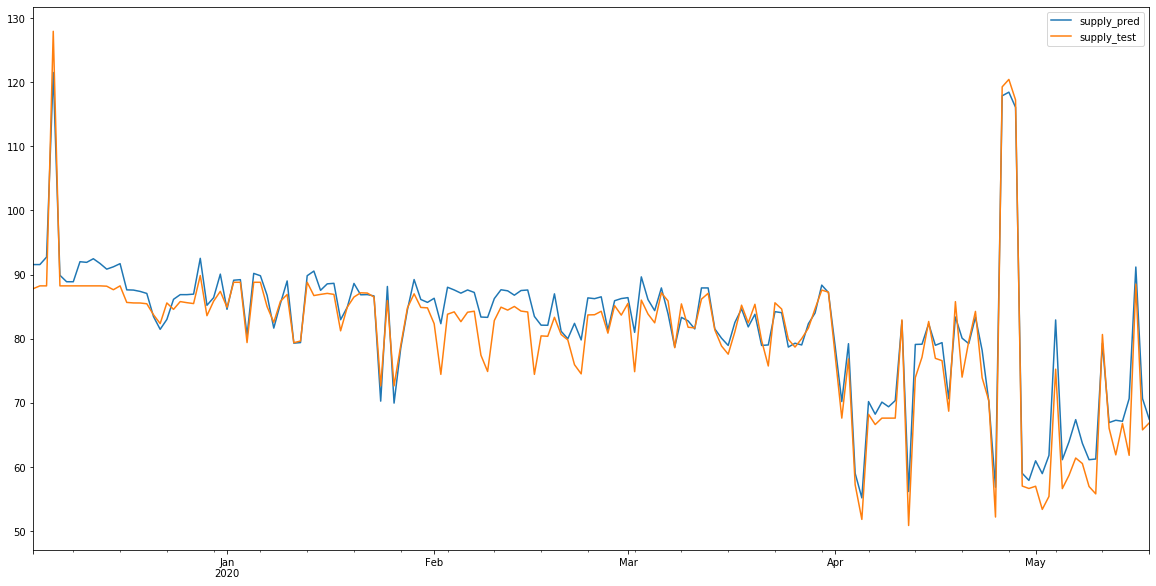

In [642]:
smp_supply_pred.plot(figsize=(20,10))